In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet34_3d_seg-round-2.csv")
df

,epoch,lr,loss_train,loss_val,fbeta_0.20,fbeta_0.25,fbeta_0.30,fbeta_0.35,fbeta_0.40,fbeta_0.45,...,fbeta_0.55,fbeta_0.60,fbeta_0.65,fbeta_0.70,fbeta_0.75,fbeta_0.80,fbeta_0.85,fbeta_0.90,fbeta_0.95,accuracy
0,1,4.000000e-06,1.160310,0.731958,0.234222,0.236863,0.238828,0.240565,0.242913,0.248230,...,0.281736,0.307100,0.290738,0.175049,0.034015,0.000747,0.000000,0.000000,0.000000,0.668952
1,2,4.654657e-06,1.092848,0.724146,0.236687,0.239174,0.241349,0.243600,0.246611,0.252548,...,0.299003,0.321219,0.288856,0.202728,0.078812,0.006862,0.000000,0.000000,0.000000,0.672254
2,3,6.600772e-06,1.115656,0.733310,0.231716,0.234090,0.236255,0.238265,0.240025,0.242483,...,0.279262,0.311026,0.324485,0.295518,0.180943,0.043204,0.001839,0.000000,0.000000,0.634557
3,4,9.785260e-06,1.084829,0.730531,0.238846,0.241365,0.245857,0.255544,0.272604,0.298021,...,0.334893,0.301058,0.203735,0.085325,0.023117,0.002757,0.000050,0.000000,0.000000,0.801218
4,5,1.412126e-05,1.077663,0.713456,0.233582,0.236467,0.238762,0.242568,0.248825,0.258173,...,0.291494,0.311184,0.328818,0.343749,0.350690,0.332764,0.203755,0.006127,0.000000,0.671850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1.221970e-07,0.364320,0.806551,0.409749,0.429808,0.448286,0.465512,0.481041,0.495341,...,0.521427,0.533852,0.546511,0.559659,0.573241,0.589891,0.607513,0.618267,0.593711,0.891427
196,197,6.892299e-08,0.380283,0.762661,0.399532,0.417359,0.433459,0.448318,0.462450,0.476306,...,0.504522,0.519176,0.534798,0.549024,0.563173,0.579430,0.597732,0.613658,0.603619,0.883049
197,198,3.085853e-08,0.357111,0.836621,0.420992,0.440044,0.457659,0.474027,0.488689,0.502400,...,0.528946,0.540808,0.552538,0.565548,0.579464,0.595520,0.610215,0.618048,0.589896,0.894337
198,199,8.015212e-09,0.352408,0.769223,0.404640,0.422563,0.438643,0.453713,0.468688,0.483070,...,0.511006,0.524831,0.538549,0.552498,0.565754,0.581477,0.597792,0.613780,0.605941,0.885870


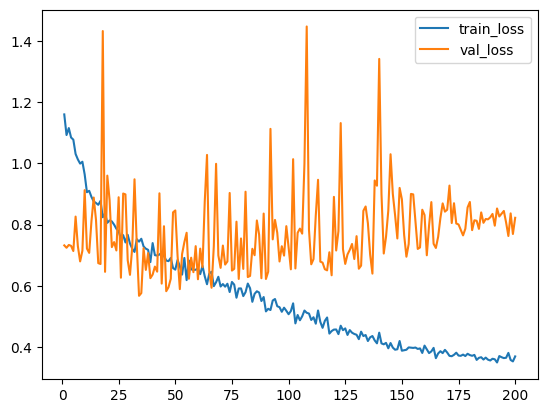

In [3]:
plt.plot(df["epoch"], df["loss_train"], label="train_loss")
plt.plot(df["epoch"], df["loss_val"], label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["loss_train"].rolling(2).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.3, 0.8)

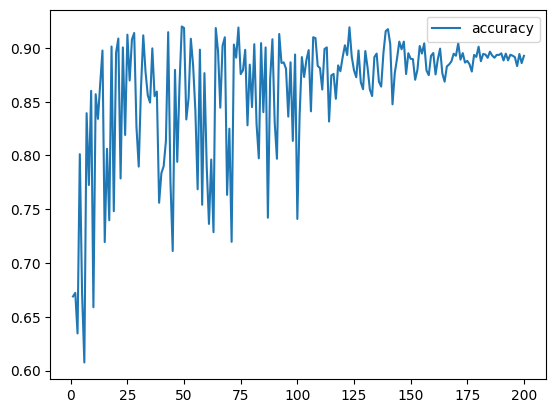

In [4]:
plt.plot(df["epoch"], df["accuracy"], label="accuracy")

plt.legend()
# plt.ylim(0.3, 0.6)

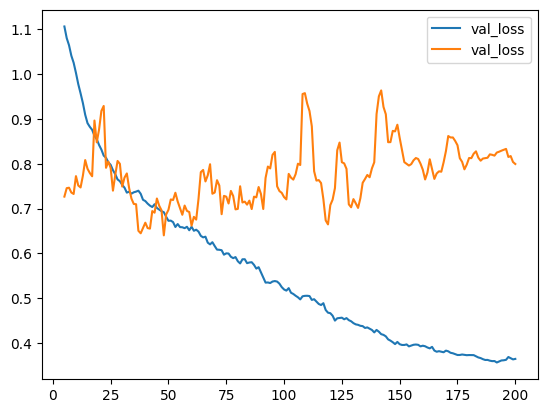

In [5]:
plt.plot(df["epoch"], df["loss_train"].rolling(5).mean(), label="val_loss")
plt.plot(df["epoch"], df["loss_val"].rolling(5).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.05, 0.3)

(200, 16)
0.6481608748435974


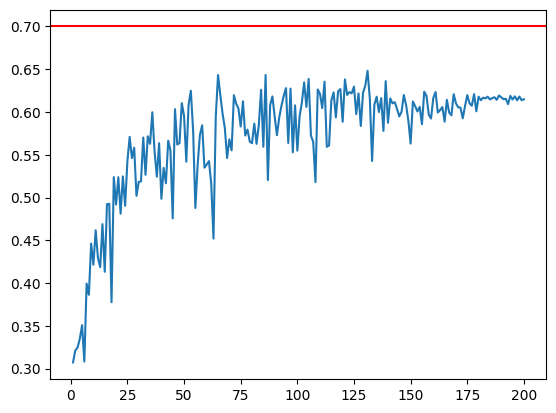

In [7]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

print(np.max(df_fbeta))

# put horizontal line at 0.55
plt.axhline(y=0.7, color='r', linestyle='-')


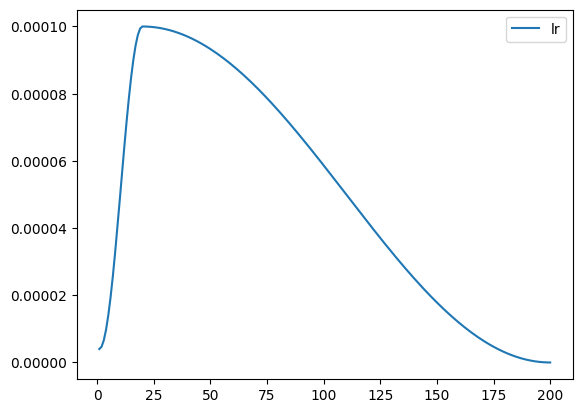

In [8]:
plt.plot(df["epoch"], df["lr"], label="lr")
plt.legend()

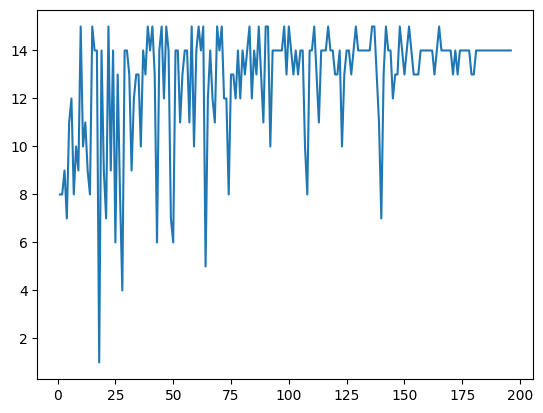

In [6]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")